<a href="https://colab.research.google.com/github/hananalataleh4-crypto/V.1-_-Ai/blob/main/V_1___Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # مكتبة للارقام والمصفوفات والعمليات الرياضية
import pandas as pd # مكتبة بتتعامل مع الجداول والملفات
import matplotlib.pyplot as plt # plt لاسم ( الخط / اعمدة / نقاط )
from sklearn.linear_model import LinearRegression # بتبين العلاقةالمدخلات (x) والهدف (y)
from sklearn.metrics import mean_squared_error, silhouette_score # لقياس خطا التوقع
from statsmodels.tsa.arima.model import ARIMA  # استيراد نموذج ARIMA لتوقع بيانات السلاسل الزمنية اعتمادا على القيم السابقة
from sklearn.metrics import mean_squared_error  # استيراد مقياس MSE لقياس مقدار الخطأ بين القيم الحقيقية والمتوقعة في نماذج التنبؤ
from sklearn.cluster import KMeans  # استيراد خوارزمية KMeans لتجميع البيانات الى عناقيد متشابهة لاكتشاف الانماط
from sklearn.preprocessing import StandardScaler  # استيراد StandardScaler لتوحيد مقاييس الاعمدة قبل التجميع حتى لا يسيطر عمود بوحدة كبيرة مثل Voltage
from sklearn.decomposition import PCA  # استيراد PCA لتقليل الابعاد وعرض البيانات على مخطط ثنائي ولتقليل الضوضاء عند الحاجة

In [ ]:
from google.colab import drive  # استيراد اداة ربط Google Drive داخل Google Colab للوصول للملفات المخزنة على الدرايف
drive.mount('/content/drive')  # عمل Mount للدرايف حتى يظهر كمسار داخل بيئة Colab ويمكن قراءة الملفات منه
df = pd.read_csv('/content/drive/MyDrive/Electricity consumption/data _ 1.csv')  # قراءة ملف CSV من الدرايف وتحويله الى DataFrame باسم df لبدء التنظيف والتحليل


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


فحص البيانات

In [ ]:
df.info() # يعرض ملخص عن بياناتي مثل عدد الصفوف والاعمدة وغيرها ليكتشف الاعمدة التي تحتوي على قيم ناقصة او مكتوبة كنص بدل رقم


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   519 non-null    object 
 1   Time                   518 non-null    object 
 2   Global_active_power    518 non-null    float64
 3   Global_reactive_power  518 non-null    float64
 4   Voltage                520 non-null    float64
 5   Global_intensity       519 non-null    object 
 6   Sub_metering_1         521 non-null    object 
 7   Sub_metering_2         519 non-null    object 
 8   Sub_metering_3         519 non-null    float64
dtypes: float64(4), object(5)
memory usage: 38.5+ KB


In [ ]:
df.tail(10)  # يقوم بعرض اخر 10  اسطر

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
536,2024-01-01,04:58:00,1.444,0.124,238.06,8.0,34.0,22.0,30.0
537,2024-01-01,02:28:00,1.357,-0.013,242.75,25.0,NaN,26.0,44.0
538,2024-01-01,04:01:00,1.166,0.126,239.24,9.0,26.0,39.0,35.0
539,2024-01-01,08:33:00,NaN,0.152,235.87,1.0,29.0,15.0,23.0
540,2024-01-01,06:23:00,1.042,0.184,235.80,NaN,17.0,29.0,28.0
541,2024-01-01,08:21:00,1.773,0.091,248.86,25.0,35.0,39.0,35.0
542,2024-01-01,05:35:00,1.156,0.091,238.95,18.0,22.0,18.0,41.0
543,2024-01-01,04:14:00,0.744,0.151,240.41,12.0,18.0,4.0,41.0
544,2024-01-01,03:16:00,0.935,0.126,248.39,8.0,34.0,34.0,NaN
545,NaN,04:19:00,1.432,0.151,241.61,22.0,30.0,24.0,32.0


In [ ]:
df.head(10)  # يقوم بعرض اول 10  اسطر

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2024-01-01,02:47:00,1.769,0.101,236.69,8.0,28.0,34.0,7.0
1,2024-01-01,00:10:00,1.061,0.152,236.87,25.0,20.0,8.0,13.0
2,2024-01-01,08:20:00,1.478,0.146,239.86,22.0,24.0,19.0,21.0
3,2024-01-01,01:21:00,1.307,0.074,245.94,1.0,29.0,30.0,43.0
4,2024-01-01,08:31:00,1.185,0.037,238.98,28.0,11.0,32.0,34.0
5,2024-01-01,07:21:00,1.190,0.186,238.14,21.0,34.0,33.0,11.0
6,2024-01-01,01:52:00,1.218,0.112,236.81,26.0,39.0,28.0,25.0
7,2024-01-01,01:38:00,1.202,0.144,242.99,12.0,20.0,NaN,20.0
8,2024-01-01,02:57:00,1.636,0.057,241.39,28.0,21.0,17.0,47.0
9,2024-01-01,01:06:00,1.178,0.097,243.06,29.0,9.0,32.0,16.0


لمعالجة التكرارات

In [ ]:
has_duplicates = df.duplicated().any() #يشرح هاد الكود انه لدي تكرارات
print ("are there duplicte ?", has_duplicates)

are there duplicte ? True


In [ ]:
no_of_duplicates = df.duplicated().sum() # ويقوم هذا الكود على اظهار عدد الاسطر المكررة
print ("number of all duplicate rows:", no_of_duplicates)

number of all duplicate rows: 26


In [ ]:
remove_duplicated = df.drop_duplicates(inplace=True) # هذا الكود يظهر عدد الاصطر بعد حذف التكرار
print("Numbers of rows after removing duplicates:", df.shape[0])

Numbers of rows after removing duplicates: 520


لمعالجة القيم الشاذة

In [ ]:
df.describe() # لاكتشاف القيم الشاذة

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_3
count,494.000000,494.000000,494.000000,494.000000
mean,1.483202,0.123231,243.127065,26.801619
std,1.660637,0.048926,17.427417,12.930502
min,0.228000,-0.015000,225.520000,5.000000
25%,1.005000,0.092000,236.950000,16.000000
50%,1.221000,0.124000,240.305000,26.000000
75%,1.420250,0.153750,243.882500,37.750000
max,13.970000,0.252000,350.380000,49.000000


In [ ]:
# التاكد ان الاعمدة المستهدفة موجودة وتجهيز قائمة الاعمدة التي سيتم تنظيفها
A = ["Global_active_power","Global_reactive_power","Voltage"]

# تحويل الاعمدة الى قيم رقمية واعتبار اي قيمة غير رقمية كقيمة مفقودة NaN
for c in A:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# دالة لتخفيف القيم الشاذة باستخدام IQR بدون حذف الصفوف
def cap_iqr(s):
    q1 = s.quantile(0.25)  # حساب الربع الاول Q1
    q3 = s.quantile(0.75)  # حساب الربع الثالث Q3
    iqr = q3 - q1          #( وهم الجزءالطبيعي من البيانات ) حساب المدى الربيعي IQR
    low = q1 - 1.5*iqr     # تحديد الحد الادنى المقبول للقيم
    high = q3 + 1.5*iqr    # تحديد الحد الاعلى المقبول للقيم
    return s.clip(lower=low, upper=high)  # قص القيم خارج الحدود لتقليل تاثير الشواذ

# تطبيق تخفيف الشواذ على كل عمود من الاعمدة المحددة
for c in A:
    if c in df.columns:
        df[c] = cap_iqr(df[c])

df.describe() #  لعرض القيم الشاذة بعد التخفيف


,Global_active_power,Global_reactive_power,Voltage,Sub_metering_3
count,494.000000,494.000000,494.000000,494.000000
mean,1.232219,0.123273,240.681660,26.801619
std,0.318435,0.048710,5.460899,12.930502
min,0.382125,-0.000625,226.551250,5.000000
25%,1.005000,0.092000,236.950000,16.000000
50%,1.221000,0.124000,240.305000,26.000000
75%,1.420250,0.153750,243.882500,37.750000
max,2.043125,0.246375,254.281250,49.000000


لمعالجة القيم الفارغة

In [ ]:
df.isnull().sum() #يظهر عدد القيم التي تكون فارغة في كل سطر

,0
Date,26
Time,26
Global_active_power,26
Global_reactive_power,26
Voltage,26
Global_intensity,24
Sub_metering_1,24
Sub_metering_2,25
Sub_metering_3,26


In [ ]:
# حفظه داخل متغير median_value لحساب وسيط قيم عمود Global_active_power
median_value = df['Global_active_power'].median()

# باستخدام الوسيط تم تعويض القيم المفقودة في عمود Global_active_power
df['Global_active_power'] = df['Global_active_power'].fillna(median_value)
print(df.head(10))

         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  2024-01-01  02:47:00                1.769                  0.101   236.69   
1  2024-01-01  00:10:00                1.061                  0.152   236.87   
2  2024-01-01  08:20:00                1.478                  0.146   239.86   
3  2024-01-01  01:21:00                1.307                  0.074   245.94   
4  2024-01-01  08:31:00                1.185                  0.037   238.98   
5  2024-01-01  07:21:00                1.190                  0.186   238.14   
6  2024-01-01  01:52:00                1.218                  0.112   236.81   
7  2024-01-01  01:38:00                1.202                  0.144   242.99   
8  2024-01-01  02:57:00                1.636                  0.057   241.39   
9  2024-01-01  01:06:00                1.178                  0.097   243.06   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0              8.0           28.0           34.0    

تحسينات للتنظيف

In [ ]:
# كلمات/رموز بتجي مكان القيم الفارغة
missing_tokens = ["error", "unknown", "missing", "?", "NA", "N/A", ""]

df = df.replace(missing_tokens, np.nan)

# يحول الأعمدة الرقمية لأرقام (حتى لو فيها نصوص)
num_cols = [
    "Global_active_power","Global_reactive_power","Voltage","Global_intensity",
    "Sub_metering_1","Sub_metering_2","Sub_metering_3"
]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# عرض أول 10 صفوف من الأعمدة بعد التحسين
df[num_cols].head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1.769,0.101,236.69,8.0,28.0,34.0,7.0
1,1.061,0.152,236.87,25.0,20.0,8.0,13.0
2,1.478,0.146,239.86,22.0,24.0,19.0,21.0
3,1.307,0.074,245.94,1.0,29.0,30.0,43.0
4,1.185,0.037,238.98,28.0,11.0,32.0,34.0
5,1.190,0.186,238.14,21.0,34.0,33.0,11.0
6,1.218,0.112,236.81,26.0,39.0,28.0,25.0
7,1.202,0.144,242.99,12.0,20.0,NaN,20.0
8,1.636,0.057,241.39,28.0,21.0,17.0,47.0
9,1.178,0.097,243.06,29.0,9.0,32.0,16.0


In [ ]:
#  نسخة عشان ما تخرب df الأصلية
df_feat = df.copy()

# lag = قيمة الهدف قبل فترة (يعطي الموديل فكرة عن الماضي)
df_feat["gap_lag1"]  = df_feat["Global_active_power"].shift(1)   # قبل دقيقة/سجل واحد
df_feat["gap_lag5"]  = df_feat["Global_active_power"].shift(5)   # قبل 5 دقائق/سجلات
df_feat["gap_lag60"] = df_feat["Global_active_power"].shift(60)  # قبل ساعة (إذا البيانات بالدقيقة)

# rolling = إحصائيات على نافذة زمنية (تساعد الموديل يفهم الاتجاه والتذبذب)
df_feat["gap_roll15_mean"] = df_feat["Global_active_power"].rolling(15).mean()  # متوسط آخر 15 دقيقة
df_feat["gap_roll60_mean"] = df_feat["Global_active_power"].rolling(60).mean()  # متوسط آخر 60 دقيقة
df_feat["gap_roll60_std"]  = df_feat["Global_active_power"].rolling(60).std()   # تذبذب آخر 60 دقيقة

# يعرض عدد القيم الناقصة الناتجة طبيعيا بسبب shift/rolling
cols_show = ["Global_active_power","gap_lag1","gap_lag5","gap_lag60","gap_roll15_mean","gap_roll60_mean","gap_roll60_std"]
print("NaN counts (طبيعي بسبب التأخير/النافذة):")
print(df_feat[cols_show].isna().sum())

# عرض أول جزء من النتائج في الأعمدة الجديدة
df_feat[cols_show].head(10)

NaN counts (طبيعي بسبب التأخير/النافذة):
Global_active_power     0
gap_lag1                1
gap_lag5                5
gap_lag60              60
gap_roll15_mean        14
gap_roll60_mean        59
gap_roll60_std         59
dtype: int64


,Global_active_power,gap_lag1,gap_lag5,gap_lag60,gap_roll15_mean,gap_roll60_mean,gap_roll60_std
0,1.769,NaN,NaN,NaN,NaN,NaN,NaN
1,1.061,1.769,NaN,NaN,NaN,NaN,NaN
2,1.478,1.061,NaN,NaN,NaN,NaN,NaN
3,1.307,1.478,NaN,NaN,NaN,NaN,NaN
4,1.185,1.307,NaN,NaN,NaN,NaN,NaN
5,1.190,1.185,1.769,NaN,NaN,NaN,NaN
6,1.218,1.190,1.061,NaN,NaN,NaN,NaN
7,1.202,1.218,1.478,NaN,NaN,NaN,NaN
8,1.636,1.202,1.307,NaN,NaN,NaN,NaN
9,1.178,1.636,1.185,NaN,NaN,NaN,NaN


In [ ]:
# الأعمدة اللي رح تنطبع (ميزات الموديل)
feature_cols = [
    "Global_reactive_power", "Voltage", "Global_intensity",
    "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"
]

# نخلي فقط الأعمدة الموجودة فعليا
feature_cols = [c for c in feature_cols if c in df.columns]

# نحذف الصفوف اللي فيها NaN بهاي الأعمدة
data = df.dropna(subset=feature_cols).copy()

# تطبيق StandardScaler
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[feature_cols] = scaler.fit_transform(data_scaled[feature_cols])
# عرض بعض النتائج
result_preview = pd.concat(
    [data[feature_cols].head(3).add_prefix("قبل_"),
     data_scaled[feature_cols].head(3).add_prefix("بعد_")],
    axis=1
)

result_preview

,قبل_Global_reactive_power,قبل_Voltage,قبل_Global_intensity,قبل_Sub_metering_1,قبل_Sub_metering_2,قبل_Sub_metering_3,بعد_Global_reactive_power,بعد_Voltage,بعد_Global_intensity,بعد_Sub_metering_1,بعد_Sub_metering_2,بعد_Sub_metering_3
0,0.101,236.69,8.0,28.0,34.0,7.0,-0.498660,-0.726496,-0.372325,0.675852,1.266315,-1.463922
1,0.152,236.87,25.0,20.0,8.0,13.0,0.570620,-0.693350,0.097484,-0.015276,-0.991029,-1.011361
2,0.146,239.86,22.0,24.0,19.0,21.0,0.444822,-0.142750,0.014576,0.330288,-0.035999,-0.407948


خوارزمية الانحدار الخطي

In [ ]:
# اختيار المتغير المستقل X من بياناتي (Voltage) والمتغير التابع y (Global_active_power)
X = df[['Voltage']].copy()
y = df['Global_active_power'].copy()

# تحويل القيم الى ارقام واي قيمة غير رقمية تتحول تلقائيا الى NaN
X['Voltage'] = pd.to_numeric(X['Voltage'], errors='coerce')
y = pd.to_numeric(y, errors='coerce')

In [ ]:
# دمج X و y ثم حذف الصفوف التي تحتوي على قيم ناقصة فقط في هذين العمودين
data = pd.concat([X, y], axis=1).dropna()

# تجهيز البيانات بصيغة مناسبة ل scikit-learn (مصفوفات)
X_clean = data[['Voltage']].values
y_clean = data['Global_active_power'].values.reshape(-1, 1)

print("Clean rows:", len(X_clean))

Clean rows: 494


In [ ]:
# تقسيم البيانات الى تدريب واختبار (80% تدريب 20% اختبار)
split = int(len(X_clean) * 0.8)
X_train, X_test = X_clean[:split], X_clean[split:]
y_train, y_test = y_clean[:split], y_clean[split:]

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 395
Test size: 99


In [ ]:
# انشاء نموذج الانحدار الخطي وتدريبه على بيانات التدريب
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# التنبؤ على بيانات الاختبار
y_pred = lr_model.predict(X_test)

# حساب متوسط مربع الخطا MSE على بيانات الاختبار
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.1042267418593836


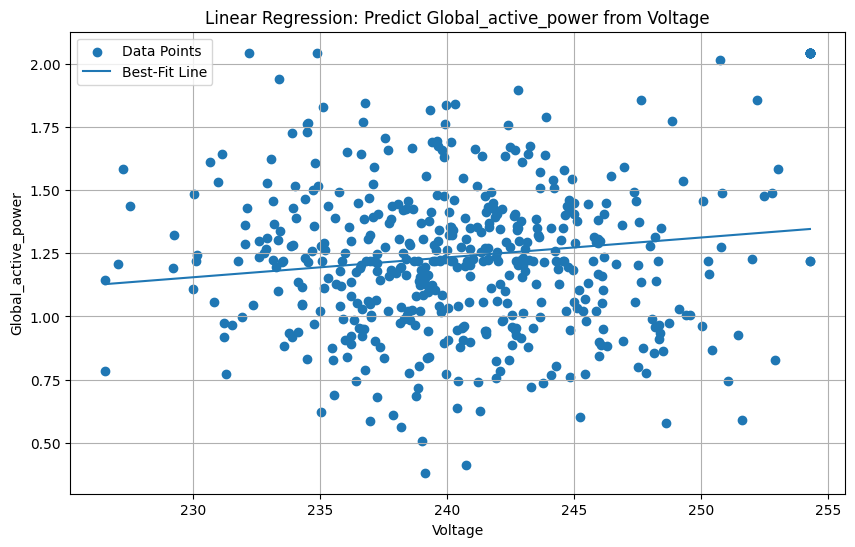

In [ ]:
# للرسم نرسم كل النقاط وخط الانحدار (باستخدام النموذج المتدرب)
order = np.argsort(X_clean[:, 0])
X_sorted = X_clean[order]
y_sorted = y_clean[order]
y_line = lr_model.predict(X_sorted)

plt.figure(figsize=(10, 6))
plt.scatter(X_sorted, y_sorted, label='Data Points')
plt.plot(X_sorted, y_line, label='Best-Fit Line')
plt.xlabel('Voltage')
plt.ylabel('Global_active_power')
plt.title('Linear Regression: Predict Global_active_power from Voltage')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# تجربة قيمة جديدة لل Voltage لمعرفة التوقع المقابل لاستهلاك الكهرباء
test_x = 240.0
test_y = lr_model.predict([[test_x]])
print(f"For Voltage = {test_x}, predicted Global_active_power = {test_y[0][0]:.3f}")

For Voltage = 240.0, predicted Global_active_power = 1.234


خوارزمية ال ARIMA

Train size: 416
Test size: 104


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best ARIMA order: (3, 1, 3)
Mean Squared Error (MSE): 0.10911913660178477


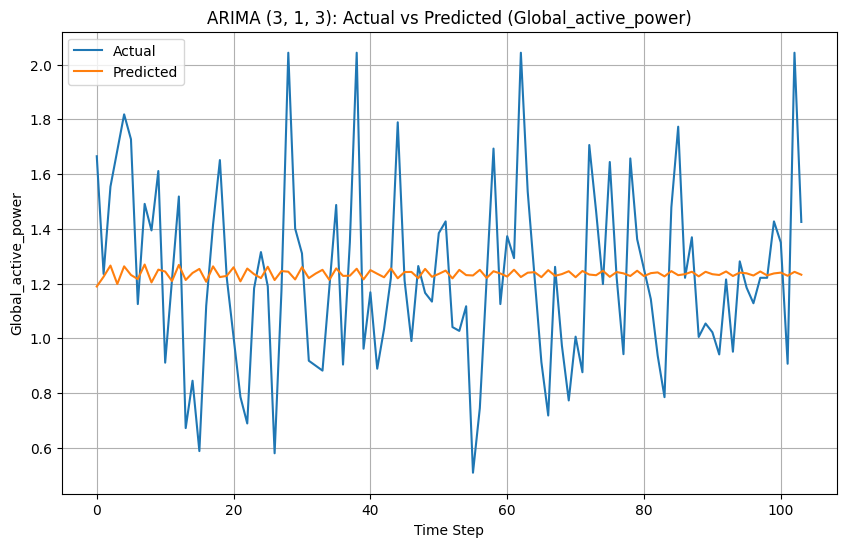

Test Prediction for Next Time Step: 1.189280087268394


In [ ]:
# 1) تجهيز عمود التاريخ والوقت وترتيب البيانات زمنيا
df["Datetime"] = pd.to_datetime(df["Date"].astype(str) + " " + df["Time"].astype(str), errors="coerce")
df = df.dropna(subset=["Datetime"]).sort_values("Datetime")

# 2) اختيار السلسلة الزمنية (Global_active_power) وتحويلها لرقمية
series = pd.to_numeric(df["Global_active_power"], errors="coerce")

# 3) جعل السلسلة منتظمة (كل دقيقة) ثم تعويض النقص بشكل زمني
series.index = df["Datetime"].values
series = series.sort_index()

full_index = pd.date_range(series.index.min(), series.index.max(), freq="min")
series = series.reindex(full_index)

series = series.interpolate(method="time")
series = series.fillna(series.median())

data = series.values

# 4) تقسيم البيانات 80/20
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data  = data[train_size:]

print("Train size:", len(train_data))
print("Test size:", len(test_data))

# 5) تجربة اكثر من ARIMA order واختيار الافضل حسب MSE
candidates = [(p, 1, q) for p in range(0, 4) for q in range(0, 4)]  # d ثابت = 1
best_order = None
best_mse = float("inf")
best_pred = None
best_model = None

for order in candidates:
    try:
        model = ARIMA(train_data, order=order)
        result = model.fit()
        pred = result.forecast(steps=len(test_data))
        mse = mean_squared_error(test_data, pred)
        if mse < best_mse:
            best_mse = mse
            best_order = order
            best_pred = pred
            best_model = result
    except:
        continue

print("Best ARIMA order:", best_order)
print("Mean Squared Error (MSE):", best_mse)

# 6) رسم Actual vs Predicted لأفضل نموذج
plt.figure(figsize=(10, 6))
plt.plot(test_data, label="Actual")
plt.plot(best_pred, label="Predicted")
plt.title(f"ARIMA {best_order}: Actual vs Predicted (Global_active_power)")
plt.xlabel("Time Step")
plt.ylabel("Global_active_power")
plt.legend()
plt.grid(True)
plt.show()

# 7) توقع خطوة واحدة قادمة
next_step = best_model.forecast(steps=1)[0]
print("Test Prediction for Next Time Step:", next_step)

خوارزمية ال K-means

الاعمدة المستخدمة: ['Voltage', 'Global_reactive_power', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
k=2  MSE=0.8694  Inertia=2441.40  Silhouette=0.1299
k=3  MSE=0.7794  Inertia=2188.62  Silhouette=0.1268
k=4  MSE=0.7065  Inertia=1983.84  Silhouette=0.1341
k=5  MSE=0.6495  Inertia=1823.73  Silhouette=0.1387
k=6  MSE=0.5999  Inertia=1684.47  Silhouette=0.1440
k=7  MSE=0.5637  Inertia=1582.99  Silhouette=0.1448

Best k based on Silhouette: 7
Best Silhouette: 0.14481199509095555


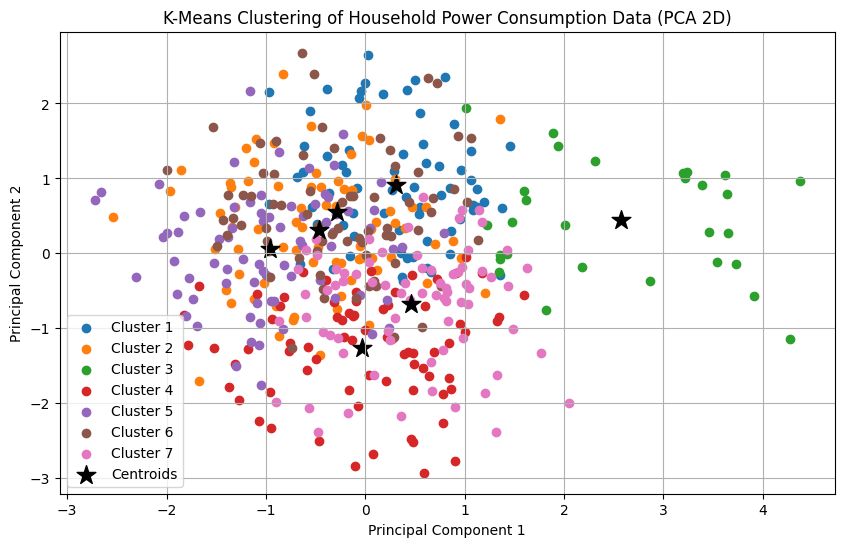

Cleaned dataset saved as 'remas.csv'


In [ ]:
# 1) اختيار الاعمدة الرقمية اللي لها علاقة بالاستهلاك
feature_cols = [
    "Voltage",
    "Global_reactive_power",
    "Global_intensity",
    "Sub_metering_1",
    "Sub_metering_2",
    "Sub_metering_3"
]
feature_cols = [c for c in feature_cols if c in df.columns]
print("الاعمدة المستخدمة:", feature_cols)

# 2) تجهيز X وتحويلها لارقام ثم تعويض النقص بالوسيط
X = df[feature_cols].copy()
for c in feature_cols:
    X[c] = pd.to_numeric(X[c], errors="coerce")
X = X.fillna(X.median(numeric_only=True))

# (اختياري قوي) 3) تخفيف الشواذ IQR قبل التوحيد
def cap_iqr(s):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    return s.clip(low, high)

for c in feature_cols:
    X[c] = cap_iqr(X[c])

# 4) توحيد المقياس
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5) نجرب عدة k ونختار الافضل بناء على Silhouette (ومعها MSE و Inertia للمقارنة)
results = []
best_k = None
best_sil = -1
best_model = None
best_labels = None

for k in range(2, 8):  # جربي 2 الى 7
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=50, max_iter=500)
    labels = kmeans.fit_predict(X_scaled)

    # MSE هنا = متوسط مربع المسافة بين النقاط ومراكز عناقيدها
    y_test = X_scaled
    y_pred = kmeans.cluster_centers_[labels]
    mse = mean_squared_error(y_test, y_pred)

    inertia = kmeans.inertia_
    sil = silhouette_score(X_scaled, labels)

    results.append((k, mse, inertia, sil))

    if sil > best_sil:
        best_sil = sil
        best_k = k
        best_model = kmeans
        best_labels = labels

# عرض النتائج
for k, mse, inertia, sil in results:
    print(f"k={k}  MSE={mse:.4f}  Inertia={inertia:.2f}  Silhouette={sil:.4f}")

print("\nBest k based on Silhouette:", best_k)
print("Best Silhouette:", best_sil)

# 6) رسم العناقيد (PCA للعرض فقط)
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)
centroids_2d = pca.transform(best_model.cluster_centers_)

plt.figure(figsize=(10, 6))
for i in range(best_k):
    pts = X_2d[best_labels == i]
    plt.scatter(pts[:, 0], pts[:, 1], label=f"Cluster {i+1}")

plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker="*", s=200, color="black", label="Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering of Household Power Consumption Data (PCA 2D)")
plt.legend()
plt.grid(True)
plt.show()

# 7) حفظ رقم العنقود في df ثم حفظ الملف
df["Cluster"] = best_labels + 1
df.to_csv("remas.csv", index=False)
print("Cleaned dataset saved as 'remas.csv'")

In [ ]:
import joblib
joblib.dump(lr_model, "/content/drive/MyDrive/Ai/Models/lr_model.pkl")
from google.colab import files
files.download("/content/drive/MyDrive/Ai/Models/lr_model.pkl")
import joblib
import pandas as pd
model = joblib.load("/content/drive/MyDrive/Ai/Models/lr_model.pkl")
print(model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LinearRegression()
